In [14]:
import innvestigate

In [15]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import losses
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
import matplotlib.pyplot as plt

In [17]:
#training iterations
epochs = 2
batch_size = 50
learning_rate = 1e-4
keep_prob = 0.5
input_shape = (28,28,1)

In [18]:
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [19]:
X_train = data.train.images.reshape((-1,28,28,1))
Y_train = data.train.labels
X_test = data.test.images.reshape((-1,28,28,1))
Y_test = data.test.labels

In [20]:
print("Training set shape:", X_train.shape)
print("Training set labels shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test set labels shape:", Y_test.shape)

Training set shape: (55000, 28, 28, 1)
Training set labels shape: (55000, 10)
Test set shape: (10000, 28, 28, 1)
Test set labels shape: (10000, 10)


In [21]:
def create_model(input_shape, keep_prob, use_soft):
    X_input = Input(input_shape);
    X = Conv2D(32, (5,5), strides = (1,1), padding = "same", name = "Z_1")(X_input);
    X = Activation('relu')(X);
    X = MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "same", name = "max_pool_1")(X);
    X = Conv2D(64, (5,5), strides = (1,1), padding = "same", name = "Z_2")(X);
    X = Activation('relu')(X);
    X = MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "same", name = "max_pool_2")(X);
    X = Flatten()(X);
    X = Dense(1024, activation = "relu", name = "A_3")(X)
    X = Dropout(keep_prob)(X)
    if use_soft:
        X = Dense(10, activation = "softmax", name = "A_4")(X)
    else:
        X = Dense(10, activation = "linear", name = "Z_4")(X)
    model = Model(inputs = X_input, outputs = X)
    return model

In [22]:
model = create_model(input_shape, keep_prob, False);
modelp = create_model(input_shape, keep_prob, True);

In [23]:
modelp.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
modelp.fit(x = X_train, y = Y_train, epochs = 2, batch_size = 50)

Epoch 1/2
55000/55000 [==============================] - 90s 2ms/step - loss: 0.1396 - acc: 0.9583
Epoch 2/2
55000/55000 [==============================] - 91s 2ms/step - loss: 0.0426 - acc: 0.9870


In [26]:
train_loss, train_metric = modelp.evaluate(x = X_train, y = Y_train)

55000/55000 [==============================] - 24s 443us/step


In [27]:
train_metric

0.9924909090909091

In [28]:
train_loss

0.025118352260474455

In [29]:
test_loss, test_metric = modelp.evaluate(x = X_test, y = Y_test)

10000/10000 [==============================] - 4s 428us/step


In [30]:
test_loss

0.02578991318413755

In [31]:
test_metric

0.9912

In [32]:
model.set_weights(modelp.get_weights())

In [56]:
analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", model)

In [57]:
analysis = analyzer.analyze(X_test[1:100,:,:,:])

In [58]:
analysis.shape

(99, 28, 28, 1)

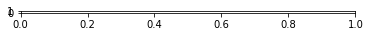

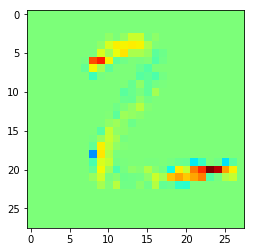

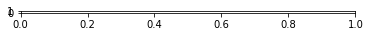

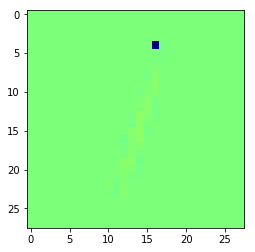

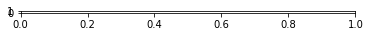

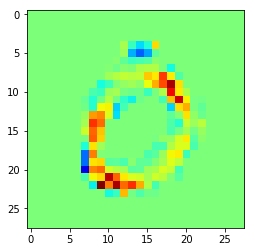

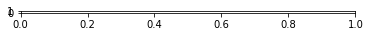

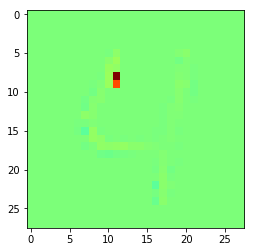

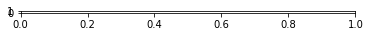

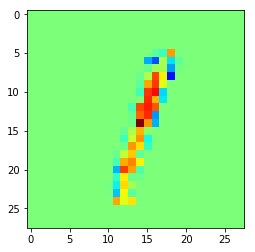

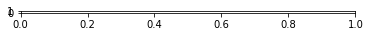

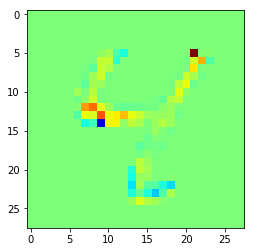

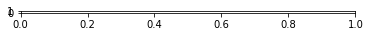

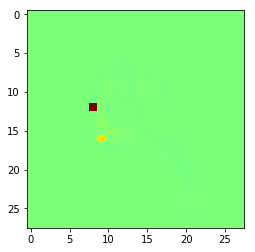

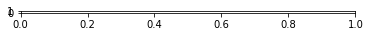

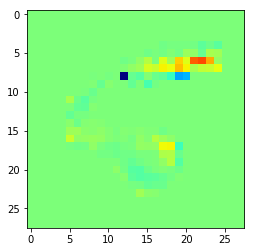

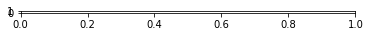

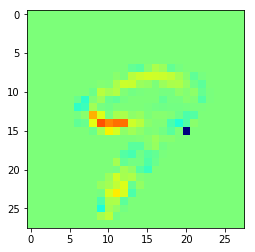

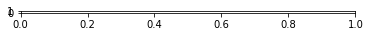

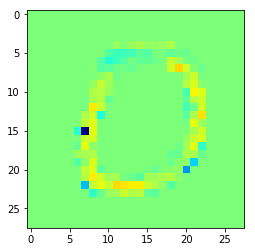

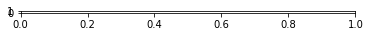

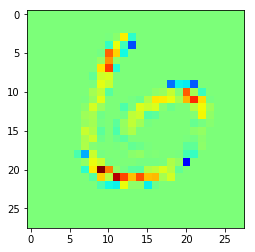

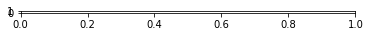

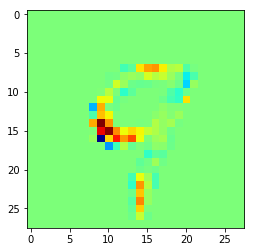

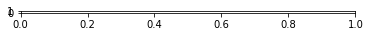

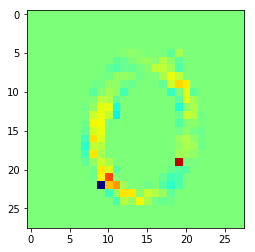

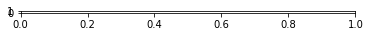

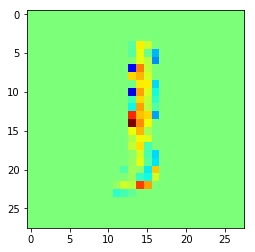

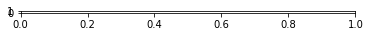

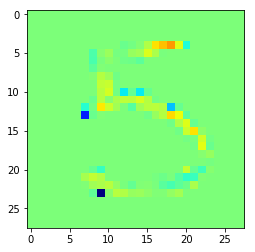

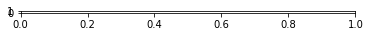

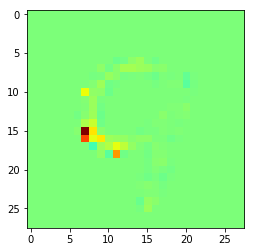

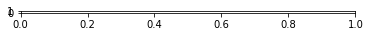

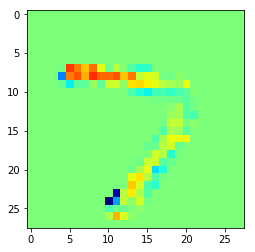

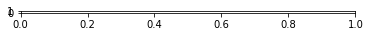

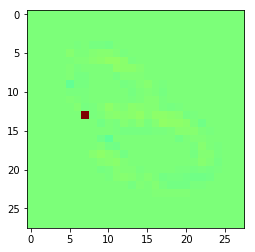

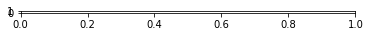

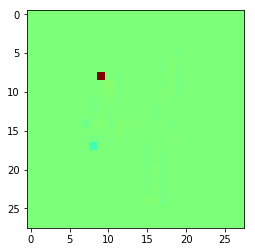

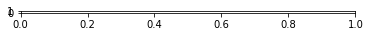

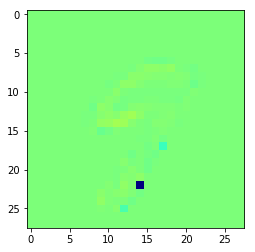

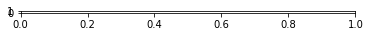

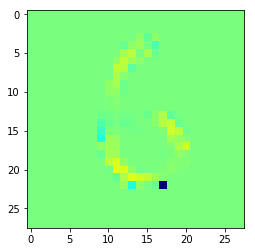

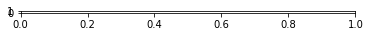

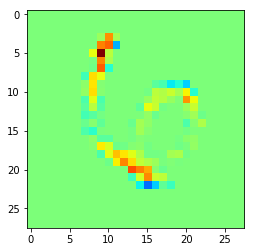

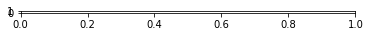

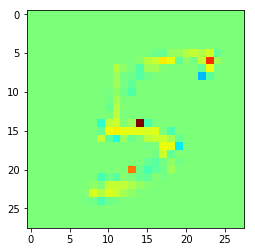

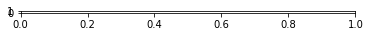

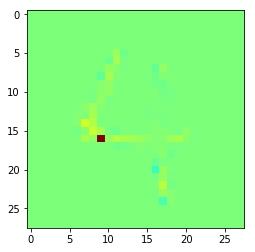

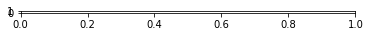

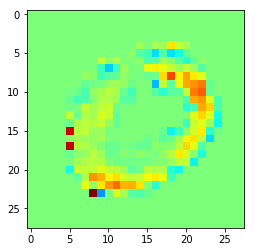

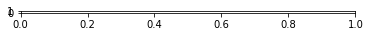

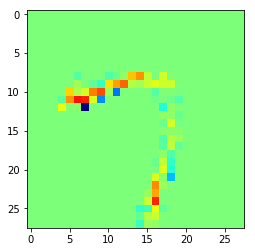

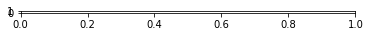

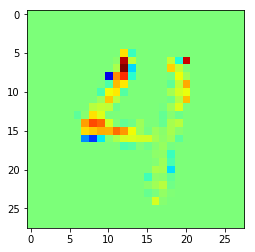

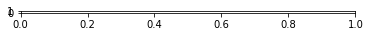

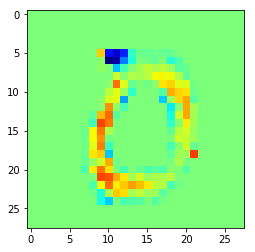

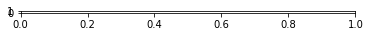

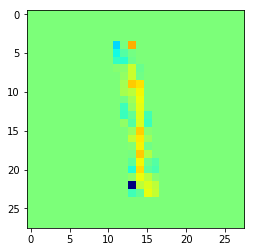

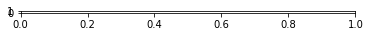

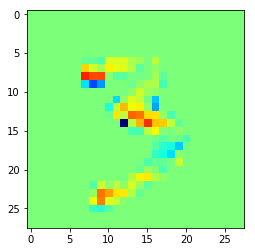

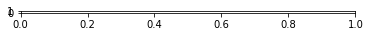

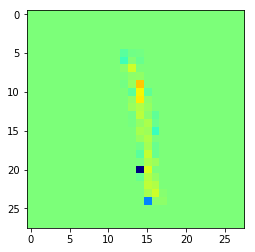

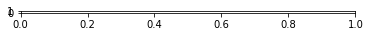

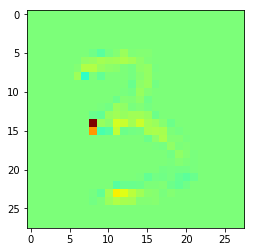

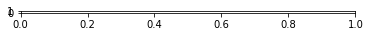

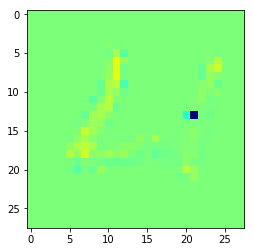

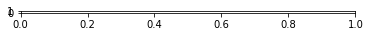

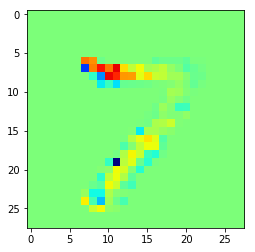

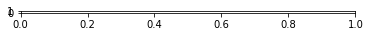

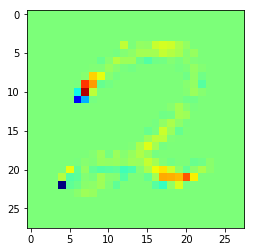

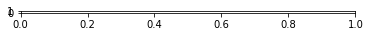

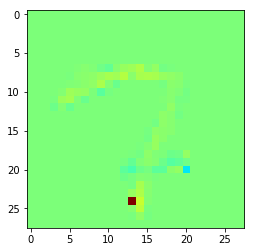

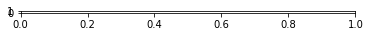

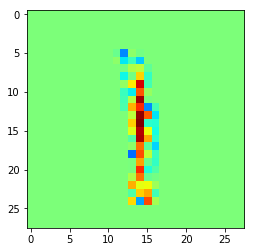

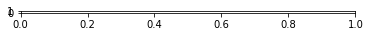

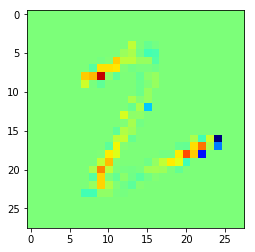

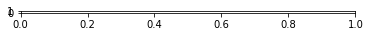

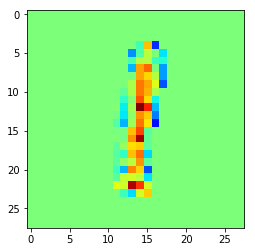

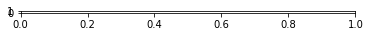

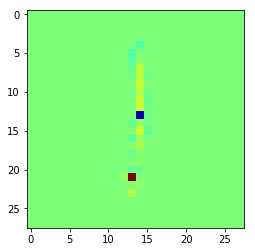

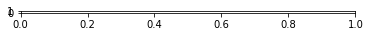

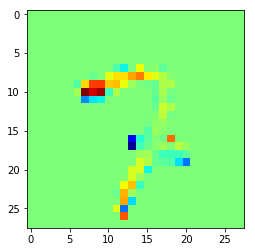

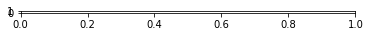

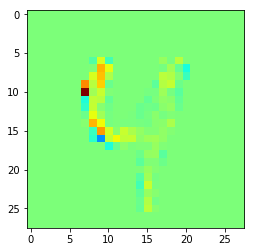

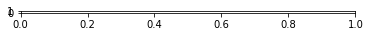

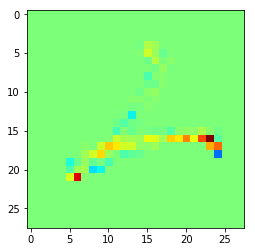

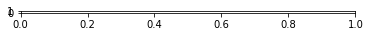

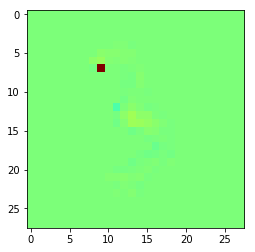

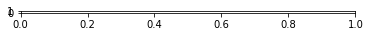

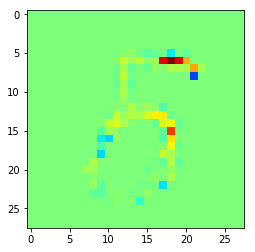

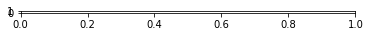

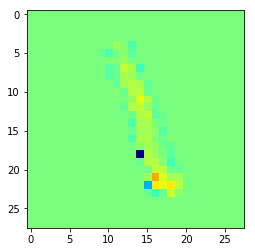

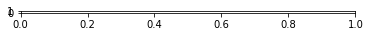

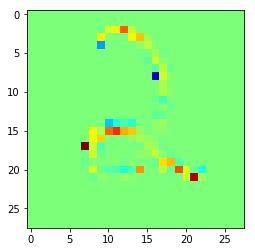

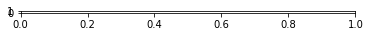

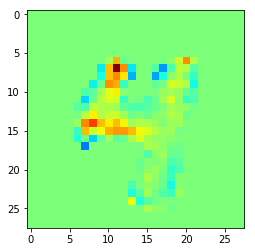

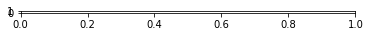

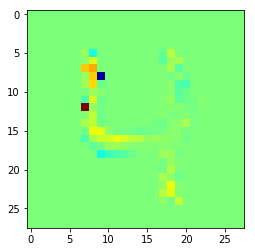

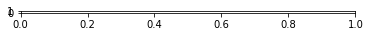

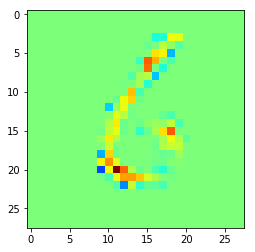

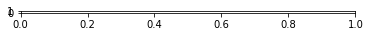

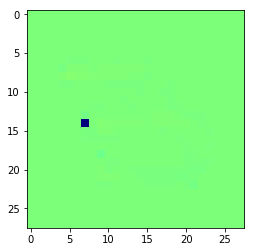

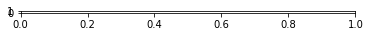

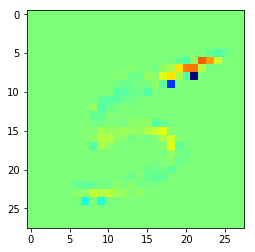

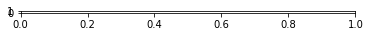

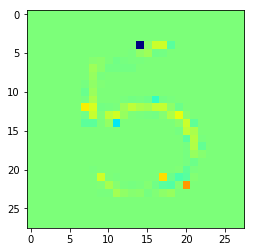

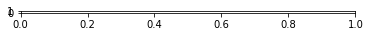

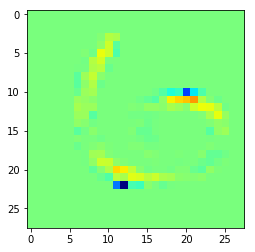

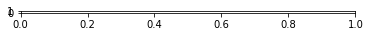

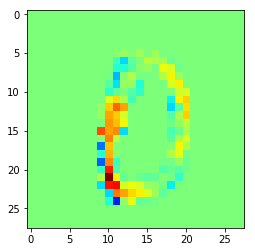

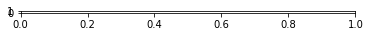

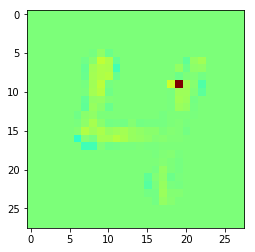

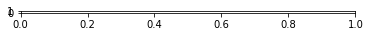

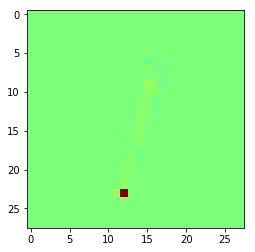

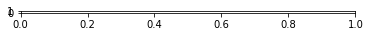

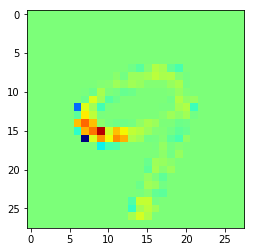

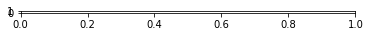

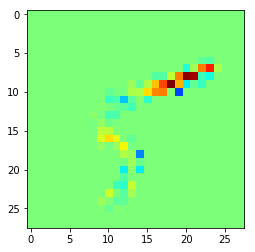

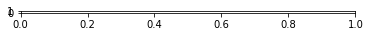

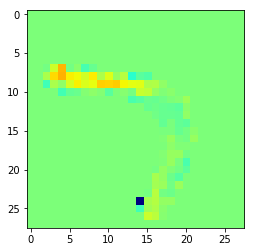

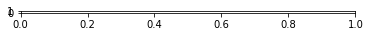

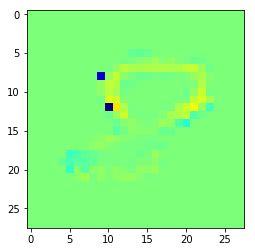

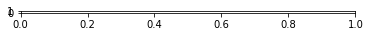

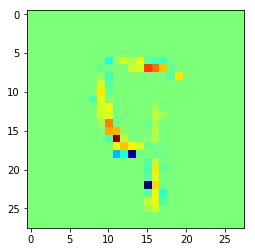

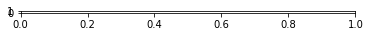

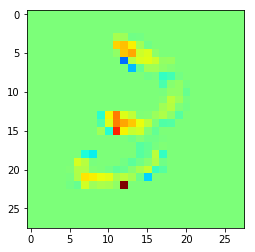

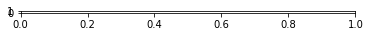

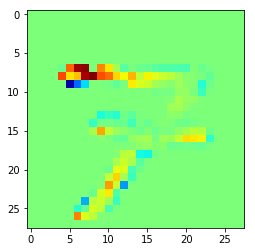

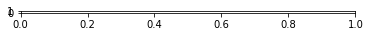

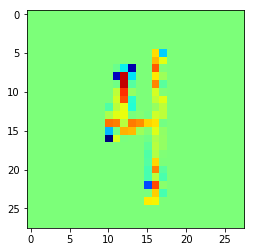

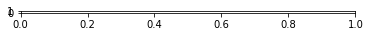

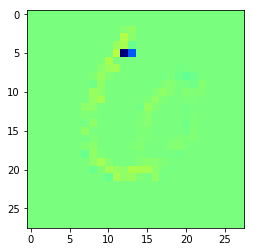

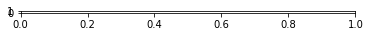

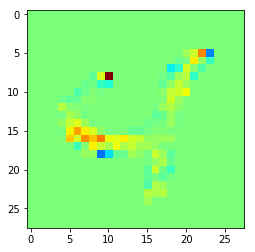

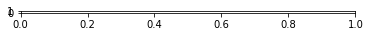

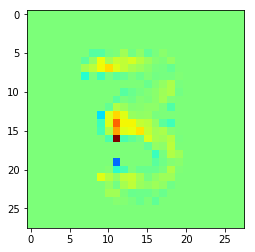

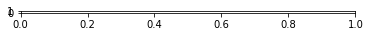

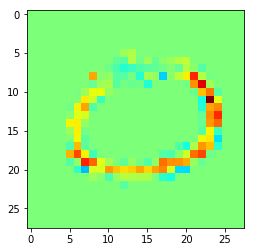

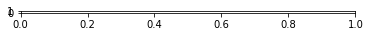

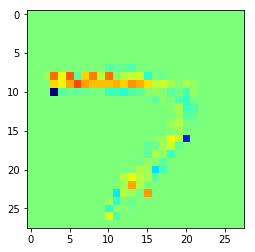

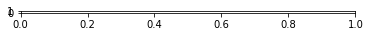

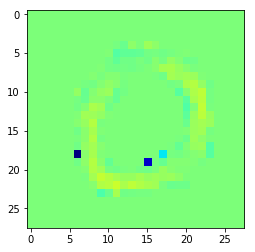

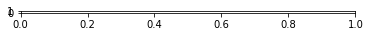

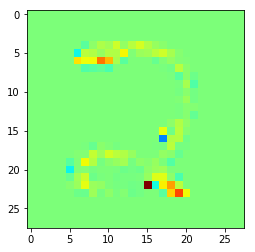

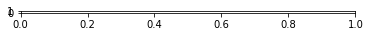

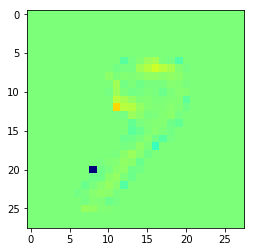

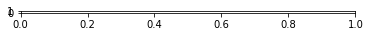

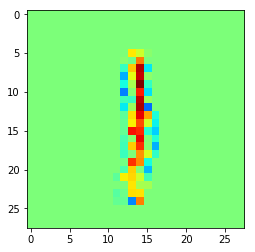

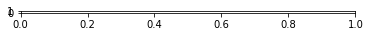

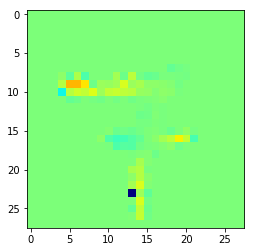

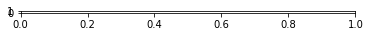

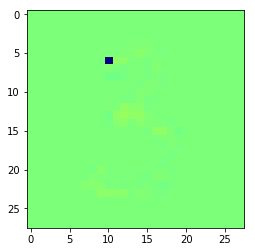

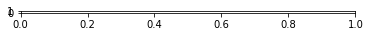

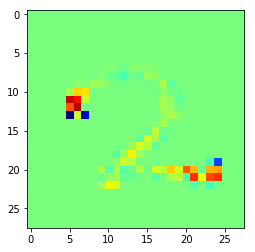

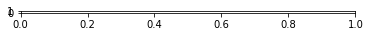

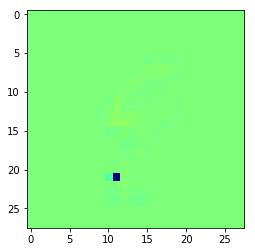

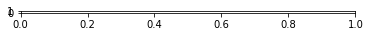

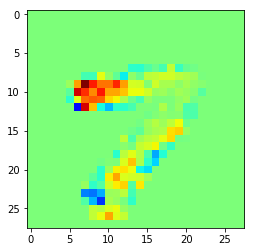

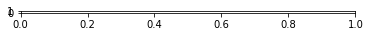

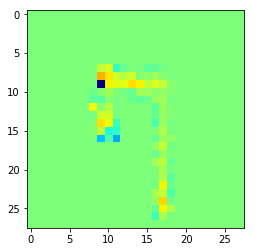

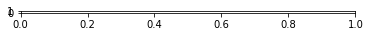

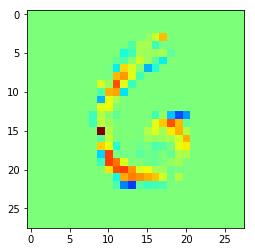

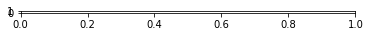

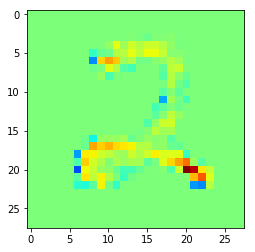

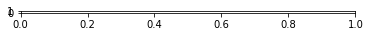

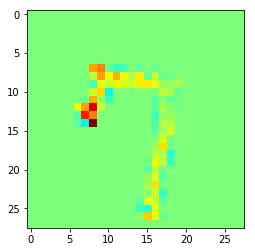

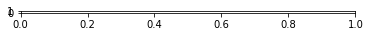

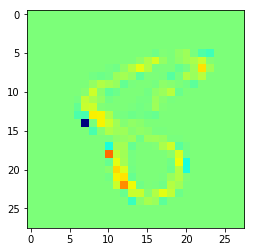

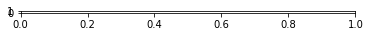

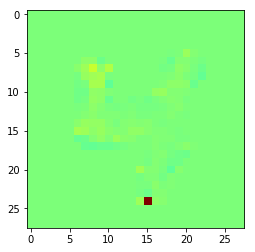

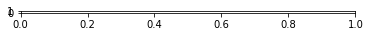

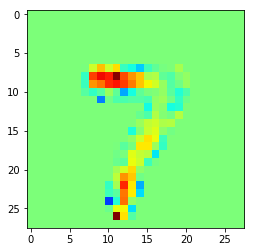

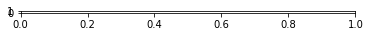

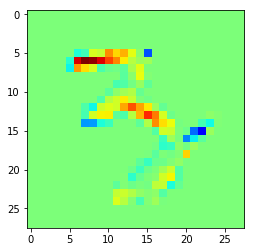

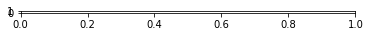

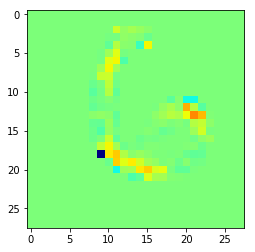

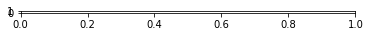

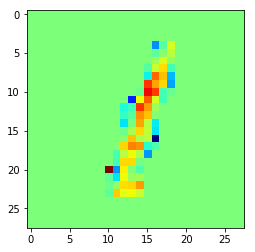

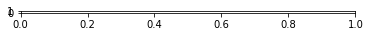

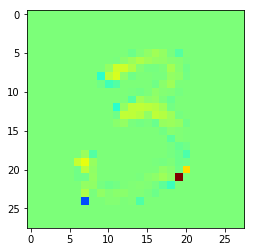

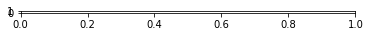

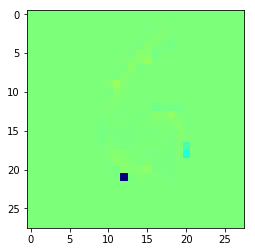

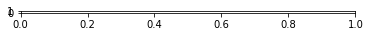

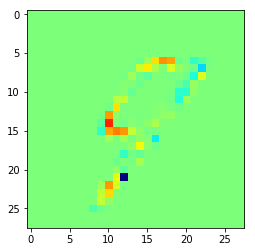

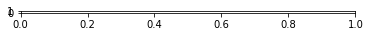

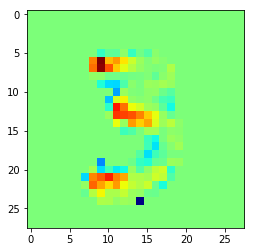

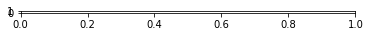

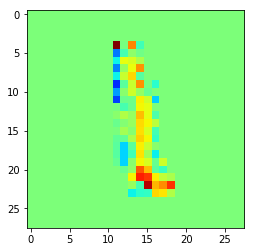

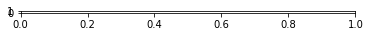

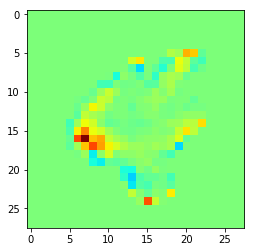

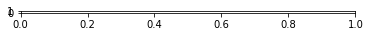

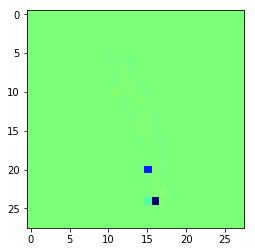

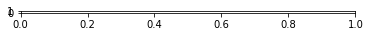

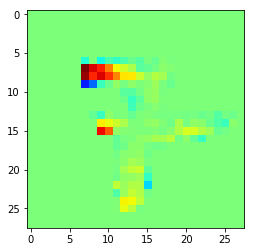

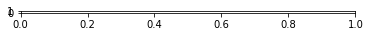

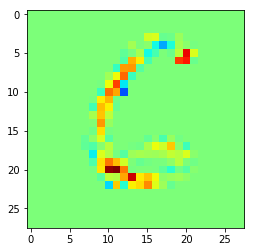

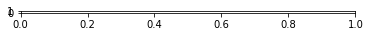

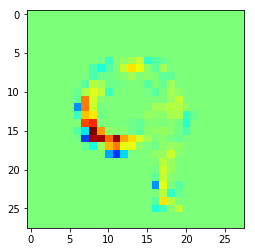

In [59]:
for i in range(99):
    plt.subplot(99,1,i+1)
    plt.figure(figsize=(4,4))
    m = np.max(np.abs(analysis[i,:,:,0]))
    a = ((analysis[i,:,:,0]/m)+1)/2
    plt.imshow(a, vmax = 1, vmin = 0, cmap = "jet")
    plt.show()